# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [1]:
import pandas as pd

df = pd.read_csv("healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df.drop(columns=['Name', 'Doctor', 'Hospital', 'Room Number', 'Date of Admission', 'Discharge Date'])
df_encoded['Gender'] = le.fit_transform(df['Gender'])
df_encoded['Blood Type'] = le.fit_transform(df['Blood Type'])
df_encoded['Medical Condition'] = le.fit_transform(df['Medical Condition'])
df_encoded['Insurance Provider'] = le.fit_transform(df['Insurance Provider'])
df_encoded['Admission Type'] = le.fit_transform(df['Admission Type'])
df_encoded['Medication'] = le.fit_transform(df['Medication'])
df_encoded['Test Results'] = le.fit_transform(df['Test Results'])

df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df_encoded['Days'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df_encoded.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Days
0,81,0,7,3,3,37490.983364,0,0,1,14
1,35,1,6,1,4,47304.064845,1,2,2,14
2,61,1,5,5,3,36874.896997,1,2,2,30
3,49,1,5,1,3,23303.322092,2,4,0,1
4,51,1,7,0,4,18086.344184,2,3,2,24


In [4]:
df_encoded.describe()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Days
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,51.452200,0.492500,3.501100,2.487500,1.979900,25516.806778,1.014900,2.02080,0.981100,15.561800
std,19.588974,0.499969,2.286071,1.701803,1.413045,14067.292709,0.814337,1.41858,0.819762,8.612038
min,18.000000,0.000000,0.000000,0.000000,0.000000,1000.180837,0.000000,0.00000,0.000000,1.000000
25%,35.000000,0.000000,2.000000,1.000000,1.000000,13506.523967,0.000000,1.00000,0.000000,8.000000
50%,52.000000,0.000000,3.000000,2.000000,2.000000,25258.112566,1.000000,2.00000,1.000000,16.000000
75%,68.000000,1.000000,5.000000,4.000000,3.000000,37733.913727,2.000000,3.00000,2.000000,23.000000
max,85.000000,1.000000,7.000000,5.000000,4.000000,49995.902283,2.000000,4.00000,2.000000,30.000000


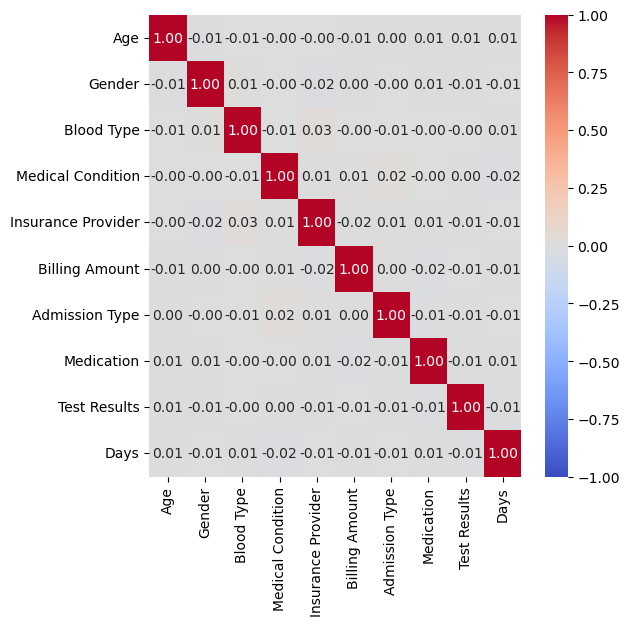

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.heatmap(data=df_encoded.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

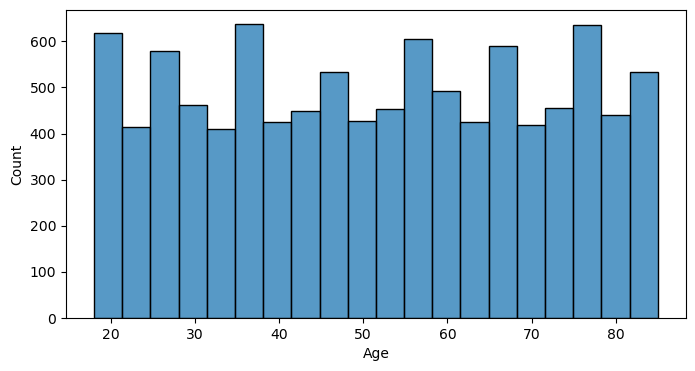

In [6]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=20)
plt.show()

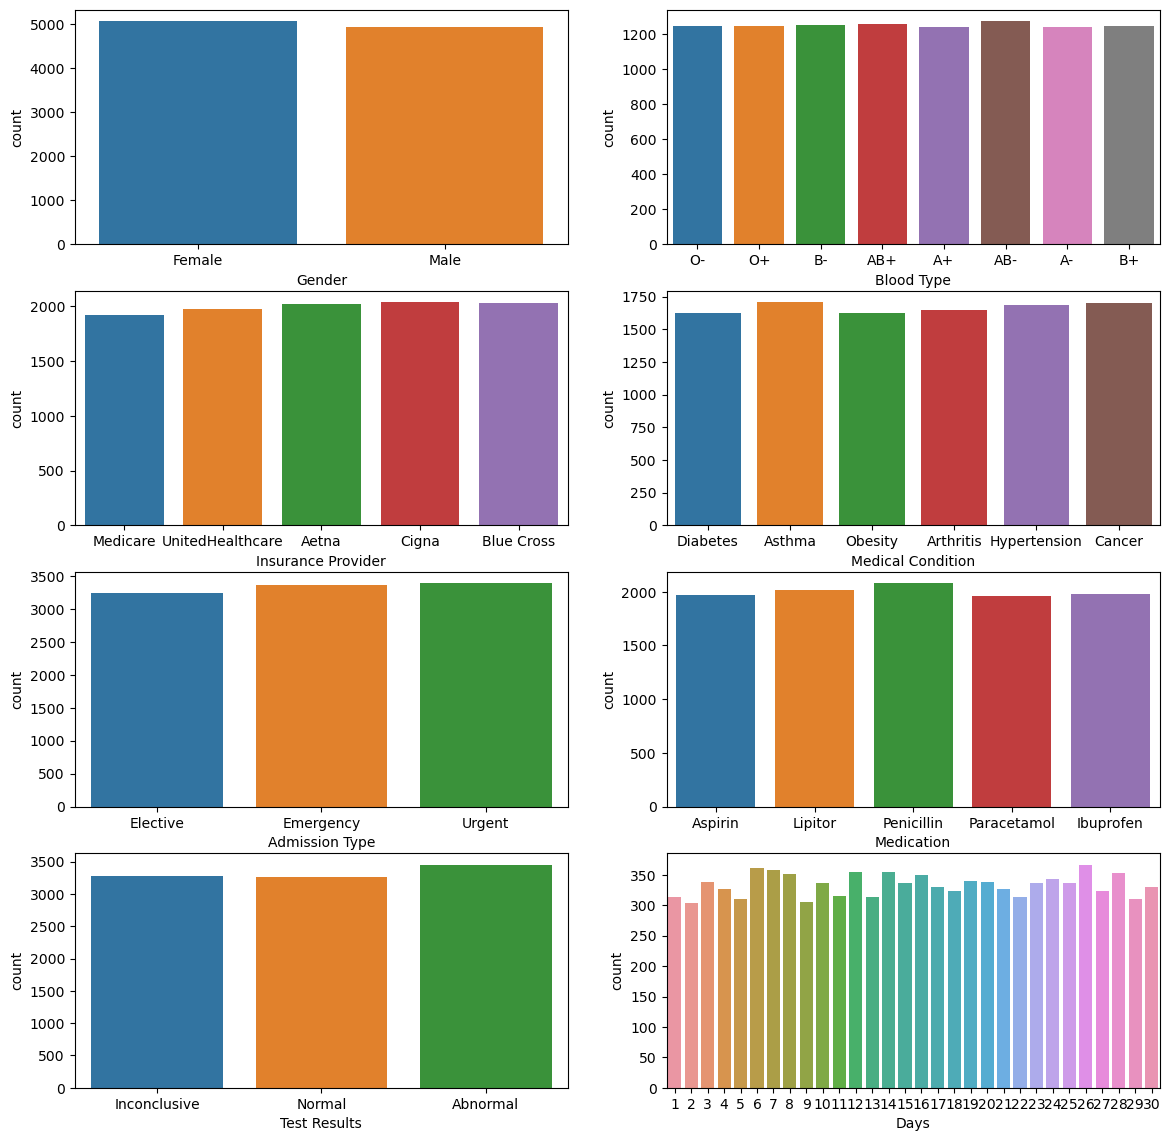

In [7]:
plt.figure(figsize=(14, 14))
plt.subplot(4, 2, 1)
sns.countplot(x=df['Gender'])

plt.subplot(4, 2, 2)
sns.countplot(x=df['Blood Type'])

plt.subplot(4, 2, 3)
sns.countplot(x=df['Insurance Provider'])

plt.subplot(4, 2, 4)
sns.countplot(x=df['Medical Condition'])

plt.subplot(4, 2, 5)
sns.countplot(x=df['Admission Type'])

plt.subplot(4, 2, 6)
sns.countplot(x=df['Medication'])

plt.subplot(4, 2, 7)
sns.countplot(x=df['Test Results'])

plt.subplot(4, 2, 8)
sns.countplot(x=df_encoded['Days'])

plt.show()

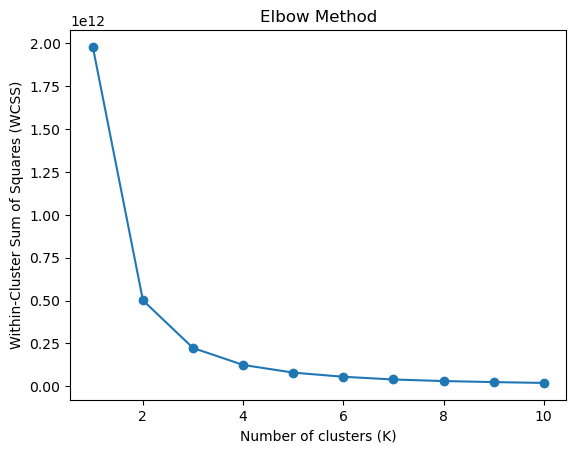

In [8]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=5, max_iter=500, random_state=0)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [9]:
from kneed import KneeLocator

findknee = KneeLocator(range(1, 11),
                       wcss,
                       curve="convex",
                       direction="decreasing")

print('the best cluster for your model is', findknee.elbow)

the best cluster for your model is 3


In [10]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, metric='euclidean')
df_encoded['Cluster'] = ac.fit_predict(df_encoded)

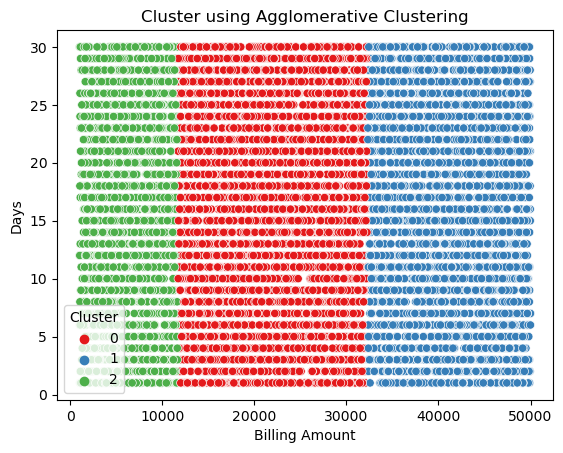

In [11]:
sns.scatterplot(data=df_encoded, x='Billing Amount', y='Days', hue='Cluster', palette='Set1')
plt.title("Cluster using Agglomerative Clustering")
plt.show()

In [12]:
km = KMeans(n_clusters=3)
df_encoded['Cluster'] = km.fit_predict(df_encoded)

D:\File\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


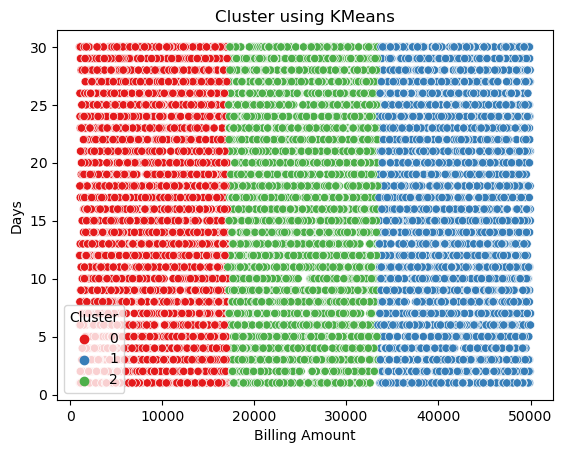

In [13]:
sns.scatterplot(data=df_encoded, x='Billing Amount', y='Days', hue='Cluster', palette='Set1')
plt.title("Cluster using KMeans")
plt.show()

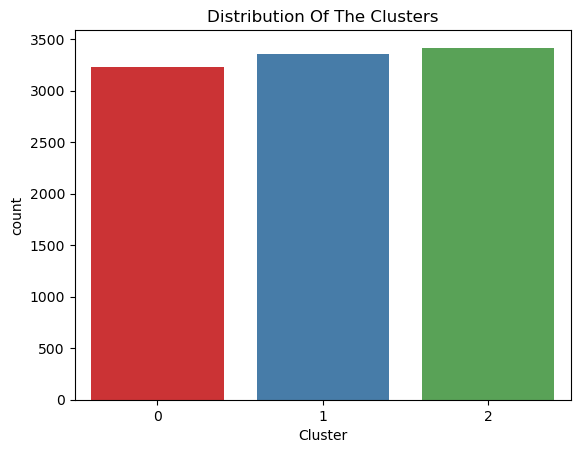

In [14]:
sns.countplot(x=df_encoded["Cluster"], palette='Set1')
plt.title("Distribution Of The Clusters")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Days', axis=1)
y = df_encoded['Days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = XGBRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("R-squared:", r2_score(y_test, predictions))

MAE: 7.920787842750549
MSE: 86.8541524311909
R-squared: -0.1638441870744176


In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("R-squared:", r2_score(y_test, predictions))

Mean Absolute Error: 7.512312376093673
Mean Squared Error: 74.85397002617503
R-squared: -0.0030419439464903775
